In [1]:
import pandas as pd


In [2]:
df=pd.DataFrame()

In [4]:
df = pd.read_csv('train.csv',index_col='Date',parse_dates=True)

In [5]:
df.tail()

,SalesPrice
Date,
2016-03-04,3198.88
2016-03-11,791.99
2016-03-18,21389.00
2016-03-25,6892.11
2016-04-01,978.22


<AxesSubplot: xlabel='Date'>

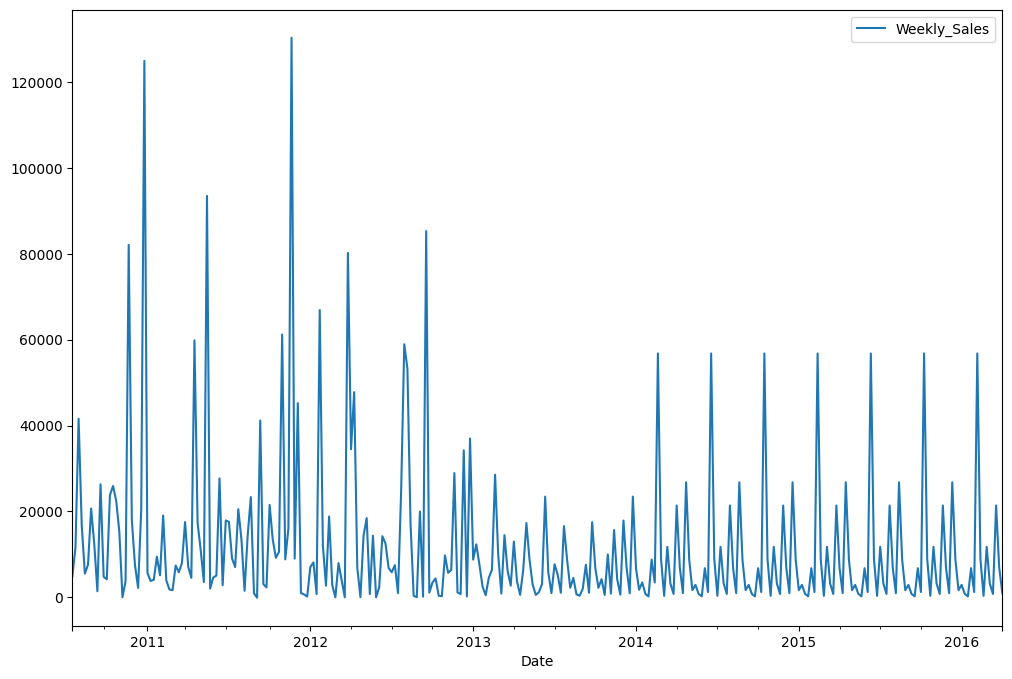

In [15]:
df.columns = ['Weekly_Sales']
df.plot(figsize=(12,8))

In [17]:
df['Sale_LastMonth']=df['Weekly_Sales'].shift(1)
df['Sale_2Monthsback']=df['Weekly_Sales'].shift(2)
df['Sale_3Monthsback']=df['Weekly_Sales'].shift(3)
df['Sale_4Monthsback']=df['Weekly_Sales'].shift(4)
df['Sale_5Monthsback']=df['Weekly_Sales'].shift(5)



In [20]:
df=df.dropna()
df

,Weekly_Sales,Sale_LastMonth,Sale_2Monthsback,Sale_3Monthsback,Sale_4Monthsback,Sale_5Monthsback
Date,,,,,,
2010-08-27,7596.88,5528.57,16722.61,41587.69,11547.44,4922.46
2010-09-03,20693.13,7596.88,5528.57,16722.61,41587.69,11547.44
2010-09-10,12394.98,20693.13,7596.88,5528.57,16722.61,41587.69
2010-09-17,1420.00,12394.98,20693.13,7596.88,5528.57,16722.61
2010-09-24,26319.17,1420.00,12394.98,20693.13,7596.88,5528.57
...,...,...,...,...,...,...
2016-03-04,3198.88,11768.77,346.55,8922.44,56789.33,1234.11
2016-03-11,791.99,3198.88,11768.77,346.55,8922.44,56789.33
2016-03-18,21389.00,791.99,3198.88,11768.77,346.55,8922.44


In [21]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [22]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [23]:
import pickle

In [24]:
pickle.dump(model,open("RfRegressor",'wb'))

In [25]:
model1 = pickle.load(open("RfRegressor",'rb'))

In [26]:
import numpy as np
x1,x2,x3,y=df['Sale_LastMonth'],df['Sale_2Monthsback'],df['Sale_3Monthsback'],df['Weekly_Sales']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[ 5.5285700e+03  1.6722610e+04  4.1587690e+04]
 [ 7.5968800e+03  5.5285700e+03  1.6722610e+04]
 [ 2.0693130e+04  7.5968800e+03  5.5285700e+03]
 [ 1.2394980e+04  2.0693130e+04  7.5968800e+03]
 [ 1.4200000e+03  1.2394980e+04  2.0693130e+04]
 [ 2.6319170e+04  1.4200000e+03  1.2394980e+04]
 [ 4.7787500e+03  2.6319170e+04  1.4200000e+03]
 [ 4.2120000e+03  4.7787500e+03  2.6319170e+04]
 [ 2.3834940e+04  4.2120000e+03  4.7787500e+03]
 [ 2.5929270e+04  2.3834940e+04  4.2120000e+03]
 [ 2.2506110e+04  2.5929270e+04  2.3834940e+04]
 [ 1.5310700e+04  2.2506110e+04  2.5929270e+04]
 [ 1.6880000e+01  1.5310700e+04  2.2506110e+04]
 [ 3.7321600e+03  1.6880000e+01  1.5310700e+04]
 [ 8.2077780e+04  3.7321600e+03  1.6880000e+01]
 [ 1.7843600e+04  8.2077780e+04  3.7321600e+03]
 [ 7.5201300e+03  1.7843600e+04  8.2077780e+04]
 [ 2.2054300e+03  7.5201300e+03  1.7843600e+04]
 [ 2.0436470e+04  2.2054300e+03  7.5201300e+03]
 [ 1.2491509e+05  2.0436470e+04  2.2054300e+03]
 [ 5.6415700e+03  1.2491509e+05  2.04364

In [27]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [29]:
model.fit(X_train, y_train.ravel())

RandomForestRegressor(max_features=3, random_state=1)

In [30]:
train_pred = model.predict(X_train)

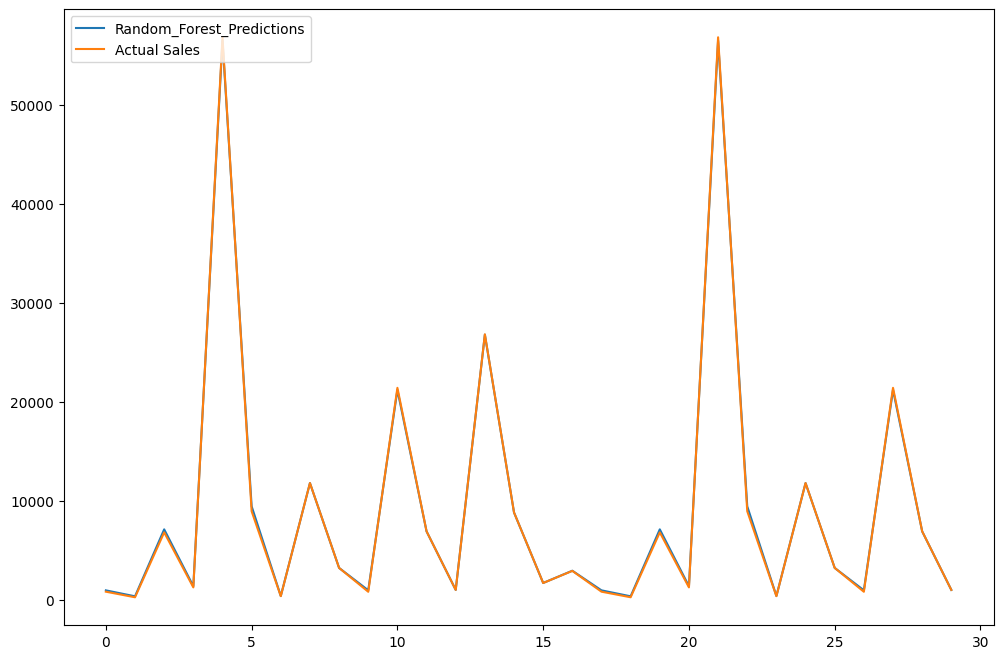

In [33]:
pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [35]:
lin_model.fit(X_train, y_train)


LinearRegression()

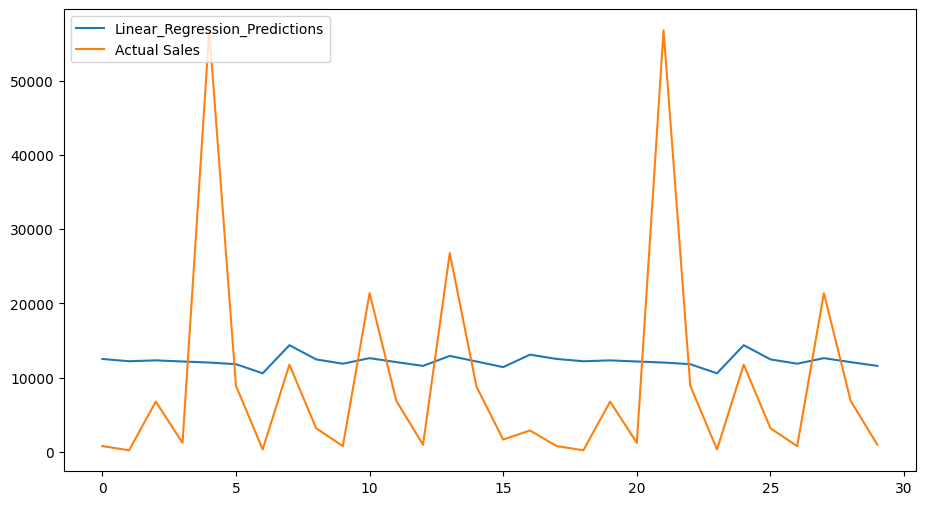

In [36]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11,6)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [37]:
test_lr = lin_model.predict(X_test)
train_lr = lin_model.predict(X_train)

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(pred,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [39]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 193.8457313691299
Mean Squared Error for Linear Regression Model is: 14563.339067506384
